In [237]:
import os
import cv2
import copy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [238]:
def proc_image(dataset):
    X = []
    Y = []
    
    width = 128
    height = 128
    
    for image_path in os.listdir(dataset):
        image = cv2.imread(f'{dataset}/{image_path}')
        X.append(cv2.resize(image, (width,height), interpolation=cv2.INTER_CUBIC))
        
        if 'y' in image_path.lower():
            Y.append(1)
        else:
            Y.append(0)
            
    return X, Y

In [239]:
X, Y = proc_image('brain_tumor_dataset')
X = np.asarray(X)
Y = np.asarray(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

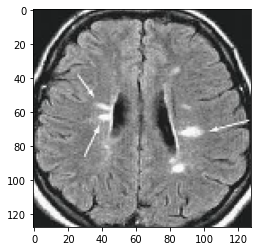

In [240]:
plt.imshow(X[0])

In [241]:
print ("Number of training examples: m_train = " + str(len(x_train)))
print ("Number of testing examples: m_test = " + str(len(x_test)))
print ("Height/Width of each image: num_px = " + str(x_train[0].shape))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 202
Number of testing examples: m_test = 51
Height/Width of each image: num_px = (128, 128, 3)
x_train shape: (202, 128, 128, 3)
y_train shape: (202,)
x_test shape: (51, 128, 128, 3)
y_test shape: (51,)


In [242]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T

In [243]:
x_train = x_train_flatten / 255
x_test = x_test_flatten / 255

x_train.shape

(49152, 202)

In [244]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    
    return s

In [245]:
def initialize_with_zeros(dims):
    w = np.zeros((dims, 1))
    b = 0.0
    
    return w, b

In [246]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward propagate
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    # backward propagate
    dw = 1/m * (np.dot(X, (A - Y).T))
    db = 1/m * (np.sum(A - Y))
    
    cost = np.squeeze(np.array(cost))
    grads = {'dw':dw,
             'db':db
            }
    
    return grads, cost

In [247]:
def optimize(w, b, X, Y, iterations=100, learning_rate=0.009):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i%100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {'w' : w,
              'b' : b
             }
    
    grads = {'dw':dw,
             'db':db
            }
    
    return params, grads, costs

In [248]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid((np.dot(w.T, X) + b))
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

In [249]:
def model(x_train, y_train, x_test, y_test, iterations=2000, learning_rate=0.009):
    w, b = initialize_with_zeros(x_train.shape[0])
    
    params, grads, costs = optimize(w, b, x_train, y_train, iterations, learning_rate )
    
    w = params['w']
    b = params['b']
    
    Y_prediction_test = predict(w, b, x_test)
    Y_prediction_train = predict(w, b, x_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": iterations}
    
    return d

In [253]:
logistic_regression_model = model(x_train, y_train, x_test, y_test, iterations=2000, learning_rate=0.009)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.768812
Cost after iteration 200: 0.079178
Cost after iteration 300: 0.057664
Cost after iteration 400: 0.046081
Cost after iteration 500: 0.038452
Cost after iteration 600: 0.032990
Cost after iteration 700: 0.028877
Cost after iteration 800: 0.025666
Cost after iteration 900: 0.023090
Cost after iteration 1000: 0.020979
Cost after iteration 1100: 0.019217
Cost after iteration 1200: 0.017725
Cost after iteration 1300: 0.016446
Cost after iteration 1400: 0.015337
Cost after iteration 1500: 0.014367
Cost after iteration 1600: 0.013511
Cost after iteration 1700: 0.012751
Cost after iteration 1800: 0.012070
Cost after iteration 1900: 0.011459
train accuracy: 100.0 %
test accuracy: 86.27450980392157 %
